# 백테스트
과거 데이터에 해당 전략을 실제로 적용하였을 때의 결과를 시뮬레이션하여 평가

## 전략 5. SIMPLE IS THE BEST 전략
- 코스피 코스닥 전체 종목 PER, PSR, PBR 지표 합산 랭크
- 상위 50 개의 주식 매수
- 다양한 기간으로 조정


### 환경설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pykrx

In [3]:
import pykrx.stock as stock 

In [4]:
%%time
psr = pd.read_excel('https://github.com/SNMHZ/DART_8TH/raw/master/backtest_0408/data/psr1.xlsx', index_col=0, sheet_name='Sheet3')

CPU times: user 1min 6s, sys: 596 ms, total: 1min 7s
Wall time: 1min 8s


In [5]:
%%time
pbr = pd.read_excel('https://github.com/SNMHZ/DART_8TH/raw/master/backtest_0408/data/pbr1.xlsx', index_col=0)

CPU times: user 1min, sys: 381 ms, total: 1min
Wall time: 1min 1s


In [6]:
%%time
per = pd.read_excel('https://github.com/SNMHZ/DART_8TH/raw/master/backtest_0408/data/per1.xlsx', index_col=0)

CPU times: user 1min, sys: 313 ms, total: 1min
Wall time: 1min


In [7]:
%%time
pricedata = pd.read_excel('https://github.com/SNMHZ/DART_8TH/raw/master/backtest_0408/data/revised_price.xlsx', index_col=0)

CPU times: user 58.9 s, sys: 539 ms, total: 59.4 s
Wall time: 59.9 s


### 데이터 상태

In [8]:
psr#.head(1)

,A005930,A000660,A051910,A035420,A006400,A005380,A207940,A035720,A068270,A000270,A012330,A066570,A096770,A051900,A028260,A005490,A036570,A091990,A034730,A017670,A003550,A105560,A055550,A018260,A015760,A009150,A032830,A090430,A003670,A326030,A251270,A086790,A033780,A011170,A009830,A003490,A010950,A018880,A034220,A352820,...,A340120,A353060,A307070,A333050,A341160,A368770,A307870,A340440,A313750,A365590,A033600,A353190,A226350,A332710,A366330,A351320,A353070,A344050,A330990,A337450,A369370,A195440,A343510,A331380,A331520,A329560,A311270,A349720,A323280,A310840,A321260,A310870,A121890,A114570,A335870,A058420,A080440,A323210,A347140,A158310
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-17,1.34342,1.69139,1.42877,6.43872,1.68894,1.18799,NaN,2.79286,13.07637,0.79865,1.55681,0.70502,10.53065,3.25734,NaN,1.08617,9.60058,NaN,2.85035,1.01002,24.46527,809.95993,11.64902,NaN,0.43221,2.48216,0.93365,3.00633,0.63967,NaN,NaN,25.04675,3.14730,1.20273,1.20381,0.43698,0.38912,0.89419,0.54500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77926,0.30898,NaN,0.35765,0.94605,NaN,NaN,NaN
2011-02-18,1.35187,1.70883,1.46234,6.48902,1.69413,1.19800,NaN,2.83775,13.55682,0.80872,1.63955,0.70502,10.74556,3.27950,NaN,1.08728,9.90605,NaN,2.92137,1.01002,24.94264,822.83915,11.75926,NaN,0.43667,2.53944,0.93782,3.01235,0.62972,NaN,NaN,25.21675,3.17486,1.23284,1.24655,0.44010,0.40556,0.94210,0.55567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77344,0.31150,NaN,0.36957,0.95211,NaN,NaN,NaN
2011-02-21,1.33497,1.67396,1.46980,6.22074,1.72012,1.19133,NaN,2.86981,13.41059,0.82887,1.68552,0.71692,11.26749,3.26177,NaN,1.05167,9.99333,NaN,2.91829,1.00681,24.34593,809.95993,11.62452,NaN,0.43667,2.52989,0.91698,3.11767,0.62324,NaN,NaN,24.93342,3.14730,1.27613,1.27682,0.43136,0.43114,0.94476,0.56253,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77344,0.31150,NaN,0.35331,0.96121,NaN,NaN,NaN
2011-02-22,1.32089,1.67396,1.41758,6.08660,1.72531,1.15796,NaN,2.86661,13.05548,0.82168,1.67327,0.70799,10.96048,3.21745,NaN,1.03832,10.21153,NaN,2.85652,1.00359,23.86856,819.97710,11.73476,NaN,0.42700,2.47261,0.90864,3.09059,0.61329,NaN,NaN,25.78342,3.16384,1.26861,1.24299,0.38767,0.42201,0.93411,0.56558,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77441,0.29887,NaN,0.35657,0.95666,NaN,NaN,NaN
2011-02-23,1.30962,1.60421,1.40265,6.35488,1.71492,1.13460,NaN,2.86981,13.18082,0.81448,1.65794,0.69610,11.14469,3.31052,NaN,1.04277,9.90605,NaN,2.81329,1.01324,23.71938,815.68403,11.68576,NaN,0.42774,2.46307,0.91698,3.10263,0.59636,NaN,NaN,25.21675,3.14730,1.21779,1.20381,0.38080,0.42931,0.92081,0.56025,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77344,0.29719,NaN,0.34356,0.96272,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,3.64270,3.59390,3.47331,15.10784,6.56838,1.31834,75.82280,25.40286,43.87528,1.03323,1.36593,0.99080,8.77557,6.46705,1.26373,0.77073,14.92976,18.12429,6.72000,1.78237,20.91146,19.76736,11.05815,2.96838,0.26198,2.94122,0.53669,3.97646,5.87668,78.48469,9.39727,8.26587,3.71853,1.11267,2.55737,0.24601,0.38336,3.55020,0.37998,1.04508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63323,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
pbr#.head(1)

,A005930,A000660,A051910,A035420,A006400,A005380,A207940,A035720,A068270,A000270,A012330,A066570,A096770,A051900,A028260,A005490,A036570,A091990,A034730,A017670,A003550,A105560,A055550,A018260,A015760,A009150,A032830,A090430,A003670,A326030,A251270,A086790,A033780,A011170,A009830,A003490,A010950,A018880,A034220,A352820,...,A340120,A353060,A307070,A333050,A341160,A368770,A307870,A340440,A313750,A365590,A033600,A353190,A226350,A332710,A366330,A351320,A353070,A344050,A330990,A337450,A369370,A195440,A343510,A331380,A331520,A329560,A311270,A349720,A323280,A310840,A321260,A310870,A121890,A114570,A335870,A058420,A080440,A323210,A347140,A158310
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-17,1.69076,2.10070,3.10446,3.83374,1.35578,1.51009,NaN,2.77570,3.83462,1.71460,2.16941,2.03314,1.26451,7.52190,NaN,1.06396,4.49233,NaN,3.41254,0.88178,2.00899,1.23432,1.29457,NaN,0.41277,3.08161,1.45136,3.24132,2.31984,NaN,NaN,0.82339,1.60677,1.99974,1.38032,2.29092,2.37526,1.61587,1.32054,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88429,1.18829,NaN,0.55747,0.52233,NaN,NaN,NaN
2011-02-18,1.70139,2.12236,3.17742,3.86369,1.35995,1.52282,NaN,2.82031,3.97551,1.73623,2.28472,2.03314,1.29032,7.57307,NaN,1.06505,4.63527,NaN,3.49758,0.88178,2.04818,1.25394,1.30682,NaN,0.41703,3.15272,1.45784,3.24781,2.28373,NaN,NaN,0.82898,1.62084,2.04981,1.42933,2.30728,2.47562,1.70244,1.34639,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87769,1.19801,NaN,0.57605,0.52568,NaN,NaN,NaN
2011-02-21,1.68012,2.07905,3.19363,3.70395,1.38081,1.51433,NaN,2.85218,3.93263,1.77948,2.34877,2.06746,1.35299,7.53213,NaN,1.03017,4.67611,NaN,3.49388,0.87897,1.99919,1.23432,1.29184,NaN,0.41703,3.14087,1.42544,3.36137,2.26027,NaN,NaN,0.81966,1.60677,2.12179,1.46404,2.26147,2.63174,1.70725,1.36301,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87769,1.19801,NaN,0.55071,0.53070,NaN,NaN,NaN
2011-02-22,1.66240,2.07905,3.08015,3.62408,1.38498,1.47191,NaN,2.84899,3.82850,1.76403,2.33169,2.04172,1.31612,7.42979,NaN,1.01709,4.77821,NaN,3.41993,0.87616,1.95999,1.24958,1.30409,NaN,0.40779,3.06976,1.41248,3.33217,2.22416,NaN,NaN,0.84760,1.61521,2.10927,1.42525,2.03237,2.57599,1.68801,1.37040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87879,1.14944,NaN,0.55578,0.52819,NaN,NaN,NaN
2011-02-23,1.64822,1.99242,3.04773,3.78382,1.37664,1.44222,NaN,2.85218,3.86525,1.74859,2.31034,2.00741,1.33824,7.64471,NaN,1.02145,4.63527,NaN,3.36817,0.88458,1.94774,1.24304,1.29865,NaN,0.40850,3.05790,1.42544,3.34515,2.16278,NaN,NaN,0.82898,1.60677,2.02478,1.38032,1.99637,2.62059,1.66397,1.35747,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87769,1.14296,NaN,0.53551,0.53154,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,3.16968,1.87426,4.60883,8.51465,4.79849,1.16899,12.21661,8.10886,13.99243,1.43603,1.28445,3.17635,1.85588,8.79721,1.03198,0.49678,7.76905,11.34655,1.43348,1.06608,1.96060,0.92194,0.70132,2.75822,0.30003,3.53112,0.41312,3.47639,9.15410,NaN,2.56691,0.67156,1.35108,0.89133,1.75387,1.07287,1.44138,6.59481,0.77158,2.79086,...,1.13887,NaN,1.12913,1.13421,1.40272,NaN,1.08742,1.08788,1.12670,NaN,NaN,NaN,0.47442,1.11542,NaN,NaN,NaN,1.04207,1.09557,1.08274,NaN,0.25115,1.84340,1.10676,1.13407,1.1098

In [10]:
per#.head(1)

,A005930,A000660,A051910,A035420,A006400,A005380,A207940,A035720,A068270,A000270,A012330,A066570,A096770,A051900,A028260,A005490,A036570,A091990,A034730,A017670,A003550,A105560,A055550,A018260,A015760,A009150,A032830,A090430,A003670,A326030,A251270,A086790,A033780,A011170,A009830,A003490,A010950,A018880,A034220,A352820,...,A340120,A353060,A307070,A333050,A341160,A368770,A307870,A340440,A313750,A365590,A033600,A353190,A226350,A332710,A366330,A351320,A353070,A344050,A330990,A337450,A369370,A195440,A343510,A331380,A331520,A329560,A311270,A349720,A323280,A310840,A321260,A310870,A121890,A114570,A335870,A058420,A080440,A323210,A347140,A158310
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-17,16.15282,133.43727,13.95425,19.58970,NaN,10.71850,NaN,11.10682,21.42310,12.27610,14.19132,NaN,9.43525,34.22575,NaN,13.34251,27.14143,NaN,31.20299,7.48191,36.46438,NaN,14.94127,NaN,NaN,34.28279,9.92205,21.62651,8.21559,NaN,NaN,57.17168,10.20895,13.59713,11.61444,NaN,10.41441,13.15583,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.53310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-18,16.25441,134.81291,14.28216,19.74274,NaN,10.80883,NaN,11.28534,22.21021,12.43093,14.94558,NaN,9.62781,34.45858,NaN,13.35618,28.00502,NaN,31.98053,7.48191,37.17588,NaN,15.08267,NaN,NaN,35.07393,9.96634,21.66981,8.08772,NaN,NaN,57.55973,10.29835,13.93759,12.02679,NaN,10.85445,13.86061,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-21,16.05123,132.06163,14.35503,18.92650,NaN,10.74861,NaN,11.41286,21.97065,12.74060,15.36461,NaN,10.09544,34.27231,NaN,12.91872,28.25176,NaN,31.94672,7.45808,36.28650,NaN,14.90985,NaN,NaN,34.94208,9.74487,22.42749,8.00460,NaN,NaN,56.91299,10.20895,14.42700,12.31887,NaN,11.53897,13.89977,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-22,15.88191,132.06163,13.84495,18.51839,NaN,10.44753,NaN,11.40011,21.38887,12.63000,15.25287,NaN,9.82036,33.80666,NaN,12.75467,28.86861,NaN,31.27060,7.43426,35.57500,NaN,15.05125,NaN,NaN,34.15093,9.65628,22.23266,7.87673,NaN,NaN,58.85320,10.26259,14.34188,11.99243,NaN,11.29450,13.74315,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.53310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-23,15.74646,126.55906,13.69921,19.33462,NaN,10.23677,NaN,11.41286,21.59421,12.51941,15.11319,NaN,9.98541,34.78454,NaN,12.80935,28.00502,NaN,30.79732,7.50574,35.35266,NaN,14.98841,NaN,NaN,34.01908,9.74487,22.31925,7.65936,NaN,NaN,57.55973,10.20895,13.76736,11.61444,NaN,11.49007,13.54738,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.83624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,36.72111,61.30877,211.78826,53.93084,271.42208,22.88034,262.17619,NaN,150.48100,22.10032,16.21087,NaN,33.30281,47.10604,46.67395,19.91104,74.08602,342.83567,15.35320,20.75603,31.47262,25.24205,14.15833,29.04502,NaN,35.75438,17.43811,47.26185,94.07687,NaN,419.14342,9.64062,12.27557,25.89935,NaN,NaN,149.38439,140.51615,NaN,6.81795,...,NaN,NaN,113.58512,NaN,NaN,NaN,103.70183,NaN,386.86131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.93401,NaN,NaN,126.38001,223.33685,114.28571,NaN,NaN,NaN,NaN,NaN,2452.38095,NaN,NaN
2021-02-09,36.58839,61.

In [11]:
pricedata#.head(1)

,A005930,A000660,A051910,A035420,A006400,A005380,A207940,A035720,A068270,A000270,A012330,A066570,A096770,A051900,A028260,A005490,A036570,A091990,A034730,A017670,A003550,A105560,A055550,A018260,A015760,A009150,A032830,A090430,A003670,A326030,A251270,A086790,A033780,A011170,A009830,A003490,A010950,A018880,A034220,A352820,...,A340120,A353060,A307070,A333050,A341160,A368770,A307870,A340440,A313750,A365590,A033600,A353190,A226350,A332710,A366330,A351320,A353070,A344050,A330990,A337450,A369370,A195440,A343510,A331380,A331520,A329560,A311270,A349720,A323280,A310840,A321260,A310870,A121890,A114570,A335870,A058420,A080440,A323210,A347140,A158310
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-17,19080,29100,383000,60269,162500,178000,NaN,87443,28350,55500,254000,115807,171500,367500,NaN,488000,220000,NaN,92300,157000,82000,56600,47550,NaN,29050,130000,112000,99926,12070,NaN,NaN,44200,57100,319500,32763,48155,106500,3360,35750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4740,6267,NaN,2546,19537,NaN,NaN,NaN
2011-02-18,19200,29400,392000,60740,163000,179500,NaN,88848,29391,56200,267500,115807,175000,370000,NaN,488500,227000,NaN,94600,157000,83600,57500,48000,NaN,29350,133000,112500,100126,11882,NaN,NaN,44500,57600,327500,33926,48499,111000,3540,36450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705,6318,NaN,2631,19662,NaN,NaN,NaN
2011-02-21,18960,28800,394000,58229,165500,178500,NaN,89852,29074,57600,275000,117761,183500,368000,NaN,472500,229000,NaN,94500,156500,81600,56600,47450,NaN,29350,132500,110000,103627,11760,NaN,NaN,44000,57100,339000,34750,47536,118000,3550,36900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705,6318,NaN,2515,19850,NaN,NaN,NaN
2011-02-22,18760,28800,380000,56973,166000,173500,NaN,89752,28304,57100,273000,116295,178500,363000,NaN,466500,234000,NaN,92500,156000,80000,57300,47900,NaN,28700,129500,109000,102726,11572,NaN,NaN,45500,57400,337000,33829,42720,115500,3510,37100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4710,6062,NaN,2538,19756,NaN,NaN,NaN
2011-02-23,18600,27600,376000,59485,165000,170000,NaN,89852,28576,56600,270500,114341,181500,373500,NaN,468500,227000,NaN,91100,157500,79500,57000,47700,NaN,28750,129000,110000,103127,11253,NaN,NaN,44500,57100,323500,32763,41964,117500,3460,36750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705,6027,NaN,2446,19881,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,83000,125000,990000,357500,770000,234000,804000.0,457000,336000,86300,322000,157000,281500,1656000,132000.0,268500,1038000,146000.0,307500,252000,104000,45050,32900,195500.0,24050,203500,72700,225500,139500,149500.0,137500.0,37250,79700,298000,54100,31400,80200,17750,23000,245500.0,...,2095.0,2035.0,2015.0,2060.0,2115.0,2050.0,2045.0,2070.0,2120.0,2100.0,179,2180.0,214.0,2090.0,2030.0,2120.0,2065.0,2080.0,2090.0,2080.0,2070.0,2075.0,2085.0,2065.0,2125.0,2035.0,2115.0,2055.0,2150.0,2175.0,2115.0,2120.0,739,620,2165.0,308,498,2060.0,2035.0,505.0
2021-02-09,82700,125500,973000,358500,772000,236500,802000.0,461000,328000,84900,325500,161000,288000,1652000,131000.0,270000,1006000,142300.0,305500,247500,105000,44750,32600,196000.0,24300,203000,72700,225000,142000,149500.0,136500.0,36300,80500,291000,53300,30450,81200,1

### 스크리닝

In [12]:
#첫 시점의 데이터 확인
psr.loc['2011-02-17']

A005930    1.34342
A000660    1.69139
A051910    1.42877
A035420    6.43872
A006400    1.68894
            ...   
A058420    0.35765
A080440    0.94605
A323210        NaN
A347140        NaN
A158310        NaN
Name: 2011-02-17 00:00:00, Length: 2260, dtype: float64

In [13]:
#오름차순 정렬
psr.loc['2011-02-17'].sort_values(ascending=True)

A123840    0.00270
A005320    0.01979
A010600    0.02509
A024900    0.03362
A036630    0.04882
            ...   
A310870        NaN
A335870        NaN
A323210        NaN
A347140        NaN
A158310        NaN
Name: 2011-02-17 00:00:00, Length: 2260, dtype: float64

In [14]:
#랭크 매기기
psr.loc['2011-02-17'].rank(ascending=True)#['A123840']

A005930    1046.0
A000660    1129.0
A051910    1068.0
A035420    1382.0
A006400    1126.0
            ...  
A058420     362.0
A080440     884.0
A323210       NaN
A347140       NaN
A158310       NaN
Name: 2011-02-17 00:00:00, Length: 2260, dtype: float64

In [15]:
#랭크 데이터프레임 생성
rank_df = pd.DataFrame(index = psr.columns)
rank_df

""
A005930
A000660
A051910
A035420
A006400
...
A058420
A080440
A323210
A347140


In [16]:
#psr등수 추가
rank_df['psr_rank'] = psr.loc['2011-02-17'].rank(ascending=True)
rank_df

,psr_rank
A005930,1046.0
A000660,1129.0
A051910,1068.0
A035420,1382.0
A006400,1126.0
...,...
A058420,362.0
A080440,884.0
A323210,NaN
A347140,NaN


In [17]:
#나머지 역시 추가
rank_df['per_rank'] = per.loc['2011-02-17'].rank(ascending=True)
rank_df['pbr_rank'] = pbr.loc['2011-02-17'].rank(ascending=True)
rank_df

,psr_rank,per_rank,pbr_rank
A005930,1046.0,656.0,1091.0
A000660,1129.0,1075.0,1203.0
A051910,1068.0,585.0,1335.0
A035420,1382.0,744.0,1390.0
A006400,1126.0,NaN,968.0
...,...,...,...
A058420,362.0,NaN,300.0
A080440,884.0,NaN,255.0
A323210,NaN,NaN,NaN
A347140,NaN,NaN,NaN


In [18]:
#등수 합 생성
rank_df['rank_sum'] = rank_df['psr_rank'] + rank_df['per_rank'] + rank_df['pbr_rank']
rank_df

,psr_rank,per_rank,pbr_rank,rank_sum
A005930,1046.0,656.0,1091.0,2793.0
A000660,1129.0,1075.0,1203.0,3407.0
A051910,1068.0,585.0,1335.0,2988.0
A035420,1382.0,744.0,1390.0,3516.0
A006400,1126.0,NaN,968.0,NaN
...,...,...,...,...
A058420,362.0,NaN,300.0,NaN
A080440,884.0,NaN,255.0,NaN
A323210,NaN,NaN,NaN,NaN
A347140,NaN,NaN,NaN,NaN


In [19]:
#NaN값 제거
rank_df = rank_df.dropna()
rank_df

,psr_rank,per_rank,pbr_rank,rank_sum
A005930,1046.0,656.0,1091.0,2793.0
A000660,1129.0,1075.0,1203.0,3407.0
A051910,1068.0,585.0,1335.0,2988.0
A035420,1382.0,744.0,1390.0,3516.0
A005380,983.0,463.0,1033.0,2479.0
...,...,...,...,...
A052190,1351.0,402.0,1080.0,2833.0
A069330,631.0,69.0,872.0,1572.0
A101680,1114.0,883.0,1049.0,3046.0
A058220,94.0,19.0,256.0,369.0


In [20]:
#등수 합으로 정렬
rank_df.sort_values(by = 'rank_sum')

,psr_rank,per_rank,pbr_rank,rank_sum
A123840,1.0,1.0,1.0,3.0
A010600,3.0,3.0,2.0,8.0
A122350,6.0,4.0,14.0,24.0
A042510,35.0,10.0,16.0,61.0
A126700,57.0,2.0,31.0,90.0
...,...,...,...,...
A048530,1379.0,1087.0,1415.0,3881.0
A047400,1390.0,1063.0,1441.0,3894.0
A074430,1451.0,1104.0,1436.0,3991.0
A005250,1453.0,1110.0,1450.0,4013.0


In [21]:
#순서대로 50개 자르기
rank_df.sort_values(by = 'rank_sum').index[:50]

Index(['A123840', 'A010600', 'A122350', 'A042510', 'A126700', 'A011090',
       'A002140', 'A024900', 'A012620', 'A012320', 'A017940', 'A018670',
       'A005710', 'A009780', 'A039240', 'A005390', 'A010660', 'A013120',
       'A001620', 'A007980', 'A004100', 'A005010', 'A017650', 'A015360',
       'A033540', 'A036580', 'A023910', 'A016590', 'A002200', 'A051380',
       'A017390', 'A006580', 'A010470', 'A053260', 'A046940', 'A058220',
       'A006980', 'A093240', 'A014530', 'A006060', 'A001680', 'A011560',
       'A011280', 'A078130', 'A008700', 'A066620', 'A077500', 'A038010',
       'A001080', 'A007330'],
      dtype='object')

In [22]:
#스크리닝 함수 정의
def screen_psr_pbr_per(date, cut=50):
  rank_df = pd.DataFrame(index = psr.columns)
  rank_df['psr_rank'] = psr.loc[date].rank(ascending=True)
  rank_df['per_rank'] = per.loc[date].rank(ascending=True)
  rank_df['pbr_rank'] = pbr.loc[date].rank(ascending=True)
  rank_df['rank_sum'] = rank_df['psr_rank'] + rank_df['per_rank'] + rank_df['pbr_rank']
  rank_df = rank_df.dropna()
  return rank_df.sort_values(by = 'rank_sum').index[:cut]

In [23]:
#정의한 함수를 이용한 스크리닝
screen_psr_pbr_per('2011-02-17')

Index(['A123840', 'A010600', 'A122350', 'A042510', 'A126700', 'A011090',
       'A002140', 'A024900', 'A012620', 'A012320', 'A017940', 'A018670',
       'A005710', 'A009780', 'A039240', 'A005390', 'A010660', 'A013120',
       'A001620', 'A007980', 'A004100', 'A005010', 'A017650', 'A015360',
       'A033540', 'A036580', 'A023910', 'A016590', 'A002200', 'A051380',
       'A017390', 'A006580', 'A010470', 'A053260', 'A046940', 'A058220',
       'A006980', 'A093240', 'A014530', 'A006060', 'A001680', 'A011560',
       'A011280', 'A078130', 'A008700', 'A066620', 'A077500', 'A038010',
       'A001080', 'A007330'],
      dtype='object')

### 자산별 비중은 어떻게?

In [24]:
#정의한 함수로 스크린된 종목 목록 생성
screen_110217 = screen_psr_pbr_per('2011-02-17')

In [25]:
#가격 정보 데이터프레임 확인해보기
pricedata

,A005930,A000660,A051910,A035420,A006400,A005380,A207940,A035720,A068270,A000270,A012330,A066570,A096770,A051900,A028260,A005490,A036570,A091990,A034730,A017670,A003550,A105560,A055550,A018260,A015760,A009150,A032830,A090430,A003670,A326030,A251270,A086790,A033780,A011170,A009830,A003490,A010950,A018880,A034220,A352820,...,A340120,A353060,A307070,A333050,A341160,A368770,A307870,A340440,A313750,A365590,A033600,A353190,A226350,A332710,A366330,A351320,A353070,A344050,A330990,A337450,A369370,A195440,A343510,A331380,A331520,A329560,A311270,A349720,A323280,A310840,A321260,A310870,A121890,A114570,A335870,A058420,A080440,A323210,A347140,A158310
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-17,19080,29100,383000,60269,162500,178000,NaN,87443,28350,55500,254000,115807,171500,367500,NaN,488000,220000,NaN,92300,157000,82000,56600,47550,NaN,29050,130000,112000,99926,12070,NaN,NaN,44200,57100,319500,32763,48155,106500,3360,35750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4740,6267,NaN,2546,19537,NaN,NaN,NaN
2011-02-18,19200,29400,392000,60740,163000,179500,NaN,88848,29391,56200,267500,115807,175000,370000,NaN,488500,227000,NaN,94600,157000,83600,57500,48000,NaN,29350,133000,112500,100126,11882,NaN,NaN,44500,57600,327500,33926,48499,111000,3540,36450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705,6318,NaN,2631,19662,NaN,NaN,NaN
2011-02-21,18960,28800,394000,58229,165500,178500,NaN,89852,29074,57600,275000,117761,183500,368000,NaN,472500,229000,NaN,94500,156500,81600,56600,47450,NaN,29350,132500,110000,103627,11760,NaN,NaN,44000,57100,339000,34750,47536,118000,3550,36900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705,6318,NaN,2515,19850,NaN,NaN,NaN
2011-02-22,18760,28800,380000,56973,166000,173500,NaN,89752,28304,57100,273000,116295,178500,363000,NaN,466500,234000,NaN,92500,156000,80000,57300,47900,NaN,28700,129500,109000,102726,11572,NaN,NaN,45500,57400,337000,33829,42720,115500,3510,37100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4710,6062,NaN,2538,19756,NaN,NaN,NaN
2011-02-23,18600,27600,376000,59485,165000,170000,NaN,89852,28576,56600,270500,114341,181500,373500,NaN,468500,227000,NaN,91100,157500,79500,57000,47700,NaN,28750,129000,110000,103127,11253,NaN,NaN,44500,57100,323500,32763,41964,117500,3460,36750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705,6027,NaN,2446,19881,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,83000,125000,990000,357500,770000,234000,804000.0,457000,336000,86300,322000,157000,281500,1656000,132000.0,268500,1038000,146000.0,307500,252000,104000,45050,32900,195500.0,24050,203500,72700,225500,139500,149500.0,137500.0,37250,79700,298000,54100,31400,80200,17750,23000,245500.0,...,2095.0,2035.0,2015.0,2060.0,2115.0,2050.0,2045.0,2070.0,2120.0,2100.0,179,2180.0,214.0,2090.0,2030.0,2120.0,2065.0,2080.0,2090.0,2080.0,2070.0,2075.0,2085.0,2065.0,2125.0,2035.0,2115.0,2055.0,2150.0,2175.0,2115.0,2120.0,739,620,2165.0,308,498,2060.0,2035.0,505.0
2021-02-09,82700,125500,973000,358500,772000,236500,802000.0,461000,328000,84900,325500,161000,288000,1652000,131000.0,270000,1006000,142300.0,305500,247500,105000,44750,32600,196000.0,24300,203000,72700,225000,142000,149500.0,136500.0,36300,80500,291000,53300,30450,81200,1

In [26]:
#가격 정보 데이터프레임에서 스크린된 종목만 획득
pricedata[screen_110217]

,A123840,A010600,A122350,A042510,A126700,A011090,A002140,A024900,A012620,A012320,A017940,A018670,A005710,A009780,A039240,A005390,A010660,A013120,A001620,A007980,A004100,A005010,A017650,A015360,A033540,A036580,A023910,A016590,A002200,A051380,A017390,A006580,A010470,A053260,A046940,A058220,A006980,A093240,A014530,A006060,A001680,A011560,A011280,A078130,A008700,A066620,A077500,A038010,A001080,A007330
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-17,1989,1652,3251,1709,5297,393,690,841,5830,46356,48100,36502,1968,745,989,473,1955,585,1257,1031,712,17900,1835,23800,1313,2410,2875,17350,12200,1954,49950,954,2010,2240,1285,551,1485,2199,1315,814,6890,3695,1350,139,424,3405,1582,1445,16000,3520
2011-02-18,2015,1662,3154,1651,5297,397,688,862,5790,46690,48000,36549,1998,745,996,477,1970,615,1287,1027,712,18100,1870,24000,1336,2440,2945,17450,12200,1962,49900,939,2040,2245,1275,633,1540,2236,1325,828,7090,3750,1385,138,426,3385,1582,1440,16000,3555
2011-02-21,1994,1600,3149,1651,5242,395,665,862,5810,45975,47750,36408,1974,745,990,488,1995,611,1299,999,710,18050,1860,24000,1320,2805,2885,17250,12100,1962,49600,939,2030,2240,1285,581,1520,2199,1315,828,6970,3745,1405,140,418,3500,1594,1430,16100,3540
2011-02-22,1974,1538,3124,1896,5242,384,665,861,5850,44782,46450,36408,1959,750,966,480,1950,601,1295,959,688,17950,1860,24000,1320,2840,2975,16600,12050,1945,49500,949,2040,2200,1280,559,1460,2245,1280,804,6860,3675,1345,138,422,3800,1592,1415,15600,3485
2011-02-23,1979,1445,3078,1803,5132,387,671,860,5820,44544,45900,36172,1902,735,934,476,1960,605,1287,935,687,17800,1850,24000,1366,2720,3020,16900,11850,1929,48850,951,2020,2180,1260,591,1440,2254,1270,799,6890,3600,1330,137,415,3850,1594,1435,15550,3515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,1015,2305,4950,3280,15100,2355,4060,3575,9520,29600,40850,102500,5970,4905,2030,1485,2465,4915,890,1990,1210,7930,11600,35000,12850,8860,32050,66000,23650,11600,88800,3260,5580,3455,6370,275,3205,4010,3380,6960,26850,6210,5290,4350,3400,21000,13200,6330,18800,9140
2021-02-09,1015,2625,4915,3280,16700,2315,4055,3470,9790,29300,40250,102000,5840,5060,2025,1495,2415,5050,899,2005,1320,7880,11200,35150,9000,9040,32200,65700,23500,11800,93000,3260,5570,3475,6290,275,3205,4150,3430,7060,27000,6230,5250,4420,3280,22300,13300,6330,18650,9020
2021-02-10,1010,2680,4905,3270,16250,2305,4050,3485,9520,29550,41100,100000,5860,5040,2030,1515,2440,5090,938,2005,1325,7860,12550,35100,8730,9400,32200,65900,23450,11500,95000,3260,5630,3480,6280,275,3185,4255,3395,7150,26750,6170,5370,4475,3205,22150,13000,6340,18650,9100


In [27]:
#따로 변수에 저장해주기
screen_price = pricedata[screen_110217]
screen_price

,A123840,A010600,A122350,A042510,A126700,A011090,A002140,A024900,A012620,A012320,A017940,A018670,A005710,A009780,A039240,A005390,A010660,A013120,A001620,A007980,A004100,A005010,A017650,A015360,A033540,A036580,A023910,A016590,A002200,A051380,A017390,A006580,A010470,A053260,A046940,A058220,A006980,A093240,A014530,A006060,A001680,A011560,A011280,A078130,A008700,A066620,A077500,A038010,A001080,A007330
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-17,1989,1652,3251,1709,5297,393,690,841,5830,46356,48100,36502,1968,745,989,473,1955,585,1257,1031,712,17900,1835,23800,1313,2410,2875,17350,12200,1954,49950,954,2010,2240,1285,551,1485,2199,1315,814,6890,3695,1350,139,424,3405,1582,1445,16000,3520
2011-02-18,2015,1662,3154,1651,5297,397,688,862,5790,46690,48000,36549,1998,745,996,477,1970,615,1287,1027,712,18100,1870,24000,1336,2440,2945,17450,12200,1962,49900,939,2040,2245,1275,633,1540,2236,1325,828,7090,3750,1385,138,426,3385,1582,1440,16000,3555
2011-02-21,1994,1600,3149,1651,5242,395,665,862,5810,45975,47750,36408,1974,745,990,488,1995,611,1299,999,710,18050,1860,24000,1320,2805,2885,17250,12100,1962,49600,939,2030,2240,1285,581,1520,2199,1315,828,6970,3745,1405,140,418,3500,1594,1430,16100,3540
2011-02-22,1974,1538,3124,1896,5242,384,665,861,5850,44782,46450,36408,1959,750,966,480,1950,601,1295,959,688,17950,1860,24000,1320,2840,2975,16600,12050,1945,49500,949,2040,2200,1280,559,1460,2245,1280,804,6860,3675,1345,138,422,3800,1592,1415,15600,3485
2011-02-23,1979,1445,3078,1803,5132,387,671,860,5820,44544,45900,36172,1902,735,934,476,1960,605,1287,935,687,17800,1850,24000,1366,2720,3020,16900,11850,1929,48850,951,2020,2180,1260,591,1440,2254,1270,799,6890,3600,1330,137,415,3850,1594,1435,15550,3515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,1015,2305,4950,3280,15100,2355,4060,3575,9520,29600,40850,102500,5970,4905,2030,1485,2465,4915,890,1990,1210,7930,11600,35000,12850,8860,32050,66000,23650,11600,88800,3260,5580,3455,6370,275,3205,4010,3380,6960,26850,6210,5290,4350,3400,21000,13200,6330,18800,9140
2021-02-09,1015,2625,4915,3280,16700,2315,4055,3470,9790,29300,40250,102000,5840,5060,2025,1495,2415,5050,899,2005,1320,7880,11200,35150,9000,9040,32200,65700,23500,11800,93000,3260,5570,3475,6290,275,3205,4150,3430,7060,27000,6230,5250,4420,3280,22300,13300,6330,18650,9020
2021-02-10,1010,2680,4905,3270,16250,2305,4050,3485,9520,29550,41100,100000,5860,5040,2030,1515,2440,5090,938,2005,1325,7860,12550,35100,8730,9400,32200,65900,23450,11500,95000,3260,5630,3480,6280,275,3185,4255,3395,7150,26750,6170,5370,4475,3205,22150,13000,6340,18650,9100


In [28]:
#시드머니. 1억원
seed_money = 100000000

In [29]:
#시드머니를 종목 수로 나눠서 한 종목당 얼마나 살지 책정
seed_money // 50

2000000

In [30]:
#스크리닝 방법 마다 종목 수는 다를 수 있음.
#len 함수를 통해 종목 수 세서 나누기
seed_money // len(screen_price.columns)

2000000

In [31]:
#각 종목당 얼마나 살지 리스트에 담아주기.
tobuy_money_list = []
for i in range(len(screen_price.columns)):
  tobuy_money_list.append(seed_money // len(screen_price.columns))

In [32]:
print(len(tobuy_money_list), tobuy_money_list)

50 [2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000]


In [33]:
#동일가중이므로 위의 내용 한 줄로 해결 가능
tobuy_money_list = [2000000] * 50

In [34]:
print(len(tobuy_money_list), tobuy_money_list)

50 [2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000]


In [35]:
#동일가중이 아닌 경우는 어떻게 해야 하는가?
#각 자산별 비중을 정해주고, (해당 자산 비중) / (전체 합) 으로 비중을 구해줄 수 있음
#아래 코드에서는 동일가중으로 수행.
weight_list = [1] * 50
print(len(weight_list), weight_list)

50 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [36]:
#모든 자산에 비중 1씩, 모두 합치면 50
#1/50씩 들어갈 것임.
sum(weight_list)

50

In [37]:
#(각 자산이 차지하는 비율) * (시드머니)로 각 자산별 배분 가치 획득
weight_sum = sum(weight_list)
tobuy_money_list = []
for wieght in weight_list:
  tobuy_money_list.append( int( (wieght / weight_sum) * seed_money ) )

In [38]:
print(len(tobuy_money_list), tobuy_money_list)

50 [2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000]


In [39]:
#함수 정의
def get_weighted_moeny_list(weight_list, seed_money):
  weight_sum = sum(weight_list)
  tobuy_money_list = []
  for wieght in weight_list:
    tobuy_money_list.append( int( (wieght / weight_sum) * seed_money ) )
  return tobuy_money_list

In [40]:
#정의한 함수로 획득.
tobuy_money_list = get_weighted_moeny_list(weight_list, seed_money)
print(len(tobuy_money_list), tobuy_money_list)

50 [2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000]


### 이제 사 봅시다.

In [41]:
#스크린된 종목들의 가격 확인
screen_price.loc['2011-02-17']

A123840     1989
A010600     1652
A122350     3251
A042510     1709
A126700     5297
A011090      393
A002140      690
A024900      841
A012620     5830
A012320    46356
A017940    48100
A018670    36502
A005710     1968
A009780      745
A039240      989
A005390      473
A010660     1955
A013120      585
A001620     1257
A007980     1031
A004100      712
A005010    17900
A017650     1835
A015360    23800
A033540     1313
A036580     2410
A023910     2875
A016590    17350
A002200    12200
A051380     1954
A017390    49950
A006580      954
A010470     2010
A053260     2240
A046940     1285
A058220      551
A006980     1485
A093240     2199
A014530     1315
A006060      814
A001680     6890
A011560     3695
A011280     1350
A078130      139
A008700      424
A066620     3405
A077500     1582
A038010     1445
A001080    16000
A007330     3520
Name: 2011-02-17 00:00:00, dtype: int64

In [42]:
for ticker, value, to_buy in zip(screen_110217, screen_price.loc['2011-02-17'], tobuy_money_list):
  print(ticker, value, to_buy, to_buy//value) # 내가 얼마나 샀다는 정보를 어떻게 저장하면 예쁘게 들어갈까?

A123840 1989 2000000 1005
A010600 1652 2000000 1210
A122350 3251 2000000 615
A042510 1709 2000000 1170
A126700 5297 2000000 377
A011090 393 2000000 5089
A002140 690 2000000 2898
A024900 841 2000000 2378
A012620 5830 2000000 343
A012320 46356 2000000 43
A017940 48100 2000000 41
A018670 36502 2000000 54
A005710 1968 2000000 1016
A009780 745 2000000 2684
A039240 989 2000000 2022
A005390 473 2000000 4228
A010660 1955 2000000 1023
A013120 585 2000000 3418
A001620 1257 2000000 1591
A007980 1031 2000000 1939
A004100 712 2000000 2808
A005010 17900 2000000 111
A017650 1835 2000000 1089
A015360 23800 2000000 84
A033540 1313 2000000 1523
A036580 2410 2000000 829
A023910 2875 2000000 695
A016590 17350 2000000 115
A002200 12200 2000000 163
A051380 1954 2000000 1023
A017390 49950 2000000 40
A006580 954 2000000 2096
A010470 2010 2000000 995
A053260 2240 2000000 892
A046940 1285 2000000 1556
A058220 551 2000000 3629
A006980 1485 2000000 1346
A093240 2199 2000000 909
A014530 1315 2000000 1520
A006060 8

In [43]:
#지갑을 만들어보자. 딕셔너리 활용
stock_wallet = {}

In [44]:
#지갑의 key를 ticker로, 매수 수량을 value로 활용
for ticker, value, to_buy in zip(screen_110217, screen_price.loc['2011-02-17'], tobuy_money_list):
  stock_wallet[ticker] = to_buy//value

In [45]:
print(stock_wallet)

{'A123840': 1005, 'A010600': 1210, 'A122350': 615, 'A042510': 1170, 'A126700': 377, 'A011090': 5089, 'A002140': 2898, 'A024900': 2378, 'A012620': 343, 'A012320': 43, 'A017940': 41, 'A018670': 54, 'A005710': 1016, 'A009780': 2684, 'A039240': 2022, 'A005390': 4228, 'A010660': 1023, 'A013120': 3418, 'A001620': 1591, 'A007980': 1939, 'A004100': 2808, 'A005010': 111, 'A017650': 1089, 'A015360': 84, 'A033540': 1523, 'A036580': 829, 'A023910': 695, 'A016590': 115, 'A002200': 163, 'A051380': 1023, 'A017390': 40, 'A006580': 2096, 'A010470': 995, 'A053260': 892, 'A046940': 1556, 'A058220': 3629, 'A006980': 1346, 'A093240': 909, 'A014530': 1520, 'A006060': 2457, 'A001680': 290, 'A011560': 541, 'A011280': 1481, 'A078130': 14388, 'A008700': 4716, 'A066620': 587, 'A077500': 1264, 'A038010': 1384, 'A001080': 125, 'A007330': 568}


In [46]:
#어떻게 dict의 value에 접근할까요?
for ticker in stock_wallet.keys():
  print(ticker, stock_wallet[ticker], end=' ')

A123840 1005 A010600 1210 A122350 615 A042510 1170 A126700 377 A011090 5089 A002140 2898 A024900 2378 A012620 343 A012320 43 A017940 41 A018670 54 A005710 1016 A009780 2684 A039240 2022 A005390 4228 A010660 1023 A013120 3418 A001620 1591 A007980 1939 A004100 2808 A005010 111 A017650 1089 A015360 84 A033540 1523 A036580 829 A023910 695 A016590 115 A002200 163 A051380 1023 A017390 40 A006580 2096 A010470 995 A053260 892 A046940 1556 A058220 3629 A006980 1346 A093240 909 A014530 1520 A006060 2457 A001680 290 A011560 541 A011280 1481 A078130 14388 A008700 4716 A066620 587 A077500 1264 A038010 1384 A001080 125 A007330 568 

### 가치가 얼마인지 계산해 봅시다.

In [47]:
#스크린된 가격 데이터프레임
screen_price

,A123840,A010600,A122350,A042510,A126700,A011090,A002140,A024900,A012620,A012320,A017940,A018670,A005710,A009780,A039240,A005390,A010660,A013120,A001620,A007980,A004100,A005010,A017650,A015360,A033540,A036580,A023910,A016590,A002200,A051380,A017390,A006580,A010470,A053260,A046940,A058220,A006980,A093240,A014530,A006060,A001680,A011560,A011280,A078130,A008700,A066620,A077500,A038010,A001080,A007330
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-17,1989,1652,3251,1709,5297,393,690,841,5830,46356,48100,36502,1968,745,989,473,1955,585,1257,1031,712,17900,1835,23800,1313,2410,2875,17350,12200,1954,49950,954,2010,2240,1285,551,1485,2199,1315,814,6890,3695,1350,139,424,3405,1582,1445,16000,3520
2011-02-18,2015,1662,3154,1651,5297,397,688,862,5790,46690,48000,36549,1998,745,996,477,1970,615,1287,1027,712,18100,1870,24000,1336,2440,2945,17450,12200,1962,49900,939,2040,2245,1275,633,1540,2236,1325,828,7090,3750,1385,138,426,3385,1582,1440,16000,3555
2011-02-21,1994,1600,3149,1651,5242,395,665,862,5810,45975,47750,36408,1974,745,990,488,1995,611,1299,999,710,18050,1860,24000,1320,2805,2885,17250,12100,1962,49600,939,2030,2240,1285,581,1520,2199,1315,828,6970,3745,1405,140,418,3500,1594,1430,16100,3540
2011-02-22,1974,1538,3124,1896,5242,384,665,861,5850,44782,46450,36408,1959,750,966,480,1950,601,1295,959,688,17950,1860,24000,1320,2840,2975,16600,12050,1945,49500,949,2040,2200,1280,559,1460,2245,1280,804,6860,3675,1345,138,422,3800,1592,1415,15600,3485
2011-02-23,1979,1445,3078,1803,5132,387,671,860,5820,44544,45900,36172,1902,735,934,476,1960,605,1287,935,687,17800,1850,24000,1366,2720,3020,16900,11850,1929,48850,951,2020,2180,1260,591,1440,2254,1270,799,6890,3600,1330,137,415,3850,1594,1435,15550,3515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,1015,2305,4950,3280,15100,2355,4060,3575,9520,29600,40850,102500,5970,4905,2030,1485,2465,4915,890,1990,1210,7930,11600,35000,12850,8860,32050,66000,23650,11600,88800,3260,5580,3455,6370,275,3205,4010,3380,6960,26850,6210,5290,4350,3400,21000,13200,6330,18800,9140
2021-02-09,1015,2625,4915,3280,16700,2315,4055,3470,9790,29300,40250,102000,5840,5060,2025,1495,2415,5050,899,2005,1320,7880,11200,35150,9000,9040,32200,65700,23500,11800,93000,3260,5570,3475,6290,275,3205,4150,3430,7060,27000,6230,5250,4420,3280,22300,13300,6330,18650,9020
2021-02-10,1010,2680,4905,3270,16250,2305,4050,3485,9520,29550,41100,100000,5860,5040,2030,1515,2440,5090,938,2005,1325,7860,12550,35100,8730,9400,32200,65900,23450,11500,95000,3260,5630,3480,6280,275,3185,4255,3395,7150,26750,6170,5370,4475,3205,22150,13000,6340,18650,9100


In [48]:
#스크린된 가격 한개 종목 추출.
#시리즈 연산에서 정수를 더하면 모든 정수가 더해진다.
screen_price['A123840'] + 0

Symbol
2011-02-17    1989
2011-02-18    2015
2011-02-21    1994
2011-02-22    1974
2011-02-23    1979
              ... 
2021-02-08    1015
2021-02-09    1015
2021-02-10    1010
2021-02-15    1030
2021-02-16    1020
Name: A123840, Length: 2463, dtype: int64

In [49]:
#곱하면? 모든 정보에 곱해진다.
screen_price['A123840']*1005

Symbol
2011-02-17    1998945
2011-02-18    2025075
2011-02-21    2003970
2011-02-22    1983870
2011-02-23    1988895
               ...   
2021-02-08    1020075
2021-02-09    1020075
2021-02-10    1015050
2021-02-15    1035150
2021-02-16    1025100
Name: A123840, Length: 2463, dtype: int64

In [50]:
screen_price['A010600']*1210

Symbol
2011-02-17    1998920
2011-02-18    2011020
2011-02-21    1936000
2011-02-22    1860980
2011-02-23    1748450
               ...   
2021-02-08    2789050
2021-02-09    3176250
2021-02-10    3242800
2021-02-15    3267000
2021-02-16    3557400
Name: A010600, Length: 2463, dtype: int64

In [51]:
#더하면? 인덱스별로 더한다.
screen_price['A123840']*1005 + screen_price['A010600']*1210

Symbol
2011-02-17    3997865
2011-02-18    4036095
2011-02-21    3939970
2011-02-22    3844850
2011-02-23    3737345
               ...   
2021-02-08    3809125
2021-02-09    4196325
2021-02-10    4257850
2021-02-15    4302150
2021-02-16    4582500
Length: 2463, dtype: int64

In [52]:
#그렇다면 이제, 차근차근 다 더해봅니다.
sum_value = 0
for ticker in stock_wallet.keys():
  ticker_value = screen_price[ticker]*stock_wallet[ticker]
  sum_value = sum_value + ticker_value
  print(ticker, end=' ')

A123840 A010600 A122350 A042510 A126700 A011090 A002140 A024900 A012620 A012320 A017940 A018670 A005710 A009780 A039240 A005390 A010660 A013120 A001620 A007980 A004100 A005010 A017650 A015360 A033540 A036580 A023910 A016590 A002200 A051380 A017390 A006580 A010470 A053260 A046940 A058220 A006980 A093240 A014530 A006060 A001680 A011560 A011280 A078130 A008700 A066620 A077500 A038010 A001080 A007330 

In [53]:
#1억을 샀는데 시작 가치가 왜 9987만원일까요?
sum_value

Symbol
2011-02-17     99873544
2011-02-18    100848593
2011-02-21    100552598
2011-02-22     99892632
2011-02-23     99270997
                ...    
2021-02-08    409988150
2021-02-09    407442369
2021-02-10    408957763
2021-02-15    416899367
2021-02-16    422044832
Length: 2463, dtype: int64

In [54]:
#딱 떨어지지 않기 때문에 약간의 현금이 남기 때문.
#기간수익률로 구현하면 이 부분은 신경쓸 필요가 없습니다.
current_cash = seed_money - sum_value.iloc[0]
current_cash

126456

In [55]:
#인덱스 설정해서 데이터프레임 객체 생성
backtest = pd.DataFrame(index=sum_value.index)
backtest

""
Symbol
2011-02-17
2011-02-18
2011-02-21
2011-02-22
2011-02-23
...
2021-02-08
2021-02-09
2021-02-10


In [56]:
#유보 현금을 더해서 전체 가치 책정
backtest['stock_value'] = sum_value
backtest['total_value'] = backtest['stock_value'] + current_cash
backtest

,stock_value,total_value
Symbol,,
2011-02-17,99873544,100000000
2011-02-18,100848593,100975049
2011-02-21,100552598,100679054
2011-02-22,99892632,100019088
2011-02-23,99270997,99397453
...,...,...
2021-02-08,409988150,410114606
2021-02-09,407442369,407568825
2021-02-10,408957763,409084219


In [57]:
#변화율 획득
backtest['total_change'] = backtest['total_value'] / seed_money
backtest

,stock_value,total_value,total_change
Symbol,,,
2011-02-17,99873544,100000000,1.000000
2011-02-18,100848593,100975049,1.009750
2011-02-21,100552598,100679054,1.006791
2011-02-22,99892632,100019088,1.000191
2011-02-23,99270997,99397453,0.993975
...,...,...,...
2021-02-08,409988150,410114606,4.101146
2021-02-09,407442369,407568825,4.075688
2021-02-10,408957763,409084219,4.090842


### 함수로 묶어봅시다.

In [58]:
##초기 필요 데이터 정리
screen_price = pricedata[screen_110217]     #스크린된 price데이터
seed_money = 100000000                      #시드머니
weight_list = [1] * len(screen_price.columns)#각 종목당 구매 가중치
tobuy_money_list = get_weighted_moeny_list(weight_list, seed_money)# 가중치로 얼마씩 살 지 리스트 생성

##구매
stock_wallet = {}
for ticker, value, to_buy in zip(screen_110217, screen_price.loc['2011-02-17'], tobuy_money_list):
  stock_wallet[ticker] = to_buy//value

##가치 계산
sum_value = 0
for ticker in stock_wallet.keys():
  ticker_value = screen_price[ticker]*stock_wallet[ticker]
  sum_value = sum_value + ticker_value
  #print(ticker, end=' ')
current_cash = seed_money - sum_value.iloc[0]

##결과 데이터프레임 생성
backtest = pd.DataFrame(index=sum_value.index)
backtest['stock_value'] = sum_value
backtest['total_value'] = backtest['stock_value'] + current_cash
backtest['total_change'] = backtest['total_value'] / seed_money

In [59]:
backtest

,stock_value,total_value,total_change
Symbol,,,
2011-02-17,99873544,100000000,1.000000
2011-02-18,100848593,100975049,1.009750
2011-02-21,100552598,100679054,1.006791
2011-02-22,99892632,100019088,1.000191
2011-02-23,99270997,99397453,0.993975
...,...,...,...
2021-02-08,409988150,410114606,4.101146
2021-02-09,407442369,407568825,4.075688
2021-02-10,408957763,409084219,4.090842


In [60]:
#한번 스크리닝해서 저리 오래 들고 있지는 않을테니,
#기간을 정해줍시다.
start = '2011-02-17'
end = '2012-02-17'

In [61]:
#정해준 기간으로 슬라이싱
pricedata[screen_110217][start:end]

,A123840,A010600,A122350,A042510,A126700,A011090,A002140,A024900,A012620,A012320,A017940,A018670,A005710,A009780,A039240,A005390,A010660,A013120,A001620,A007980,A004100,A005010,A017650,A015360,A033540,A036580,A023910,A016590,A002200,A051380,A017390,A006580,A010470,A053260,A046940,A058220,A006980,A093240,A014530,A006060,A001680,A011560,A011280,A078130,A008700,A066620,A077500,A038010,A001080,A007330
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-17,1989,1652,3251,1709,5297,393,690,841,5830,46356,48100,36502,1968,745,989,473,1955,585,1257,1031,712,17900,1835,23800,1313,2410,2875,17350,12200,1954,49950,954,2010,2240,1285,551,1485,2199,1315,814,6890,3695,1350,139,424,3405,1582,1445,16000,3520
2011-02-18,2015,1662,3154,1651,5297,397,688,862,5790,46690,48000,36549,1998,745,996,477,1970,615,1287,1027,712,18100,1870,24000,1336,2440,2945,17450,12200,1962,49900,939,2040,2245,1275,633,1540,2236,1325,828,7090,3750,1385,138,426,3385,1582,1440,16000,3555
2011-02-21,1994,1600,3149,1651,5242,395,665,862,5810,45975,47750,36408,1974,745,990,488,1995,611,1299,999,710,18050,1860,24000,1320,2805,2885,17250,12100,1962,49600,939,2030,2240,1285,581,1520,2199,1315,828,6970,3745,1405,140,418,3500,1594,1430,16100,3540
2011-02-22,1974,1538,3124,1896,5242,384,665,861,5850,44782,46450,36408,1959,750,966,480,1950,601,1295,959,688,17950,1860,24000,1320,2840,2975,16600,12050,1945,49500,949,2040,2200,1280,559,1460,2245,1280,804,6860,3675,1345,138,422,3800,1592,1415,15600,3485
2011-02-23,1979,1445,3078,1803,5132,387,671,860,5820,44544,45900,36172,1902,735,934,476,1960,605,1287,935,687,17800,1850,24000,1366,2720,3020,16900,11850,1929,48850,951,2020,2180,1260,591,1440,2254,1270,799,6890,3600,1330,137,415,3850,1594,1435,15550,3515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-13,1952,1295,2895,885,9214,510,850,1550,6650,58505,59400,66888,3092,1870,1364,1515,3040,800,1966,1846,775,24500,2025,25400,1921,4040,16850,18050,12250,1950,47550,870,3030,2690,985,933,2555,2565,1760,904,14450,2860,1675,124,595,8800,2233,1440,18200,3495
2012-02-14,1952,1250,2930,820,9214,519,977,1550,6420,58715,59100,66983,3142,1800,1350,1695,3040,802,2109,1894,785,24100,2040,25350,1927,4080,16500,18050,12200,1958,47800,884,3060,2620,1130,930,2720,2598,1745,916,14650,2940,1635,124,574,8790,2228,1475,17600,3465
2012-02-15,1942,1300,2895,799,9602,528,879,1505,6430,59658,59200,66983,3236,1750,1358,1485,3020,800,2080,1918,768,26900,2010,25350,1931,4050,16450,17800,12200,1937,47450,920,3000,2625,1295,915,2630,2987,1760,913,14150,3140,1620,124,660,8210,2349,1480,18050,3500


In [62]:
##초기 필요 데이터 정리
screen_price = pricedata[screen_110217][start:end]     #스크린된 price데이터
seed_money = 100000000                      #시드머니
weight_list = [1] * len(screen_price.columns)#각 종목당 구매 가중치
tobuy_money_list = get_weighted_moeny_list(weight_list, seed_money)# 가중치로 얼마씩 살 지 리스트 생성

##구매
stock_wallet = {}
for ticker, value, to_buy in zip(screen_110217, screen_price.loc['2011-02-17'], tobuy_money_list):
  stock_wallet[ticker] = to_buy//value

##가치 계산
sum_value = 0
for ticker in stock_wallet.keys():
  ticker_value = screen_price[ticker]*stock_wallet[ticker]
  sum_value = sum_value + ticker_value
  #print(ticker, end=' ')
current_cash = seed_money - sum_value.iloc[0]

##결과 데이터프레임 생성
backtest = pd.DataFrame(index=sum_value.index)
backtest['stock_value'] = sum_value
backtest['total_value'] = backtest['stock_value'] + current_cash
backtest['total_change'] = backtest['total_value'] / seed_money

In [63]:
backtest

,stock_value,total_value,total_change
Symbol,,,
2011-02-17,99873544,100000000,1.000000
2011-02-18,100848593,100975049,1.009750
2011-02-21,100552598,100679054,1.006791
2011-02-22,99892632,100019088,1.000191
2011-02-23,99270997,99397453,0.993975
...,...,...,...
2012-02-13,144345047,144471503,1.444715
2012-02-14,145658331,145784787,1.457848
2012-02-15,145399668,145526124,1.455261


In [64]:
def backtest_by_date(pricedata, screened_list, weight_list, seed_money, start, end):
  ##초기 필요 데이터 정리
  screen_price = pricedata[screen_110217][start:end]    #스크린된 price데이터
  tobuy_money_list = get_weighted_moeny_list(weight_list, seed_money)# 가중치로 얼마씩 살 지 리스트 생성

  ##구매
  stock_wallet = {}
  for ticker, value, to_buy in zip(screen_110217, screen_price.loc[start], tobuy_money_list):
    stock_wallet[ticker] = to_buy//value

  ##가치 계산
  sum_value = 0
  for ticker in stock_wallet.keys():
    ticker_value = screen_price[ticker]*stock_wallet[ticker]
    sum_value = sum_value + ticker_value
    #print(ticker, end=' ')
  current_cash = seed_money - sum_value.iloc[0]

  ##결과 데이터프레임 생성
  backtest = pd.DataFrame(index=sum_value.index)
  backtest['stock_value'] = sum_value
  backtest['total_value'] = backtest['stock_value'] + current_cash
  backtest['total_change'] = backtest['total_value'] / seed_money
  return backtest

In [65]:
weight_list = [1] * len(screen_price.columns)         #각 종목당 구매 가중치
seed_money = 100000000

In [66]:
screened_list = screen_psr_pbr_per('2011-02-17')
backtest_by_date(pricedata, screened_list, weight_list, seed_money, '2011-02-17', '2012-02-17')

,stock_value,total_value,total_change
Symbol,,,
2011-02-17,99873544,100000000,1.000000
2011-02-18,100848593,100975049,1.009750
2011-02-21,100552598,100679054,1.006791
2011-02-22,99892632,100019088,1.000191
2011-02-23,99270997,99397453,0.993975
...,...,...,...
2012-02-13,144345047,144471503,1.444715
2012-02-14,145658331,145784787,1.457848
2012-02-15,145399668,145526124,1.455261


In [68]:
#미래참조 문제. lagging의 필요성.
screened_list = screen_psr_pbr_per('2011-02-17')
backtest_by_date(pricedata, screened_list, weight_list, seed_money, '2011-02-18', '2012-02-17')

,stock_value,total_value,total_change
Symbol,,,
2011-02-18,99827218,100000000,1.000000
2011-02-21,99557914,99730696,0.997307
2011-02-22,98930497,99103279,0.991033
2011-02-23,98292380,98465162,0.984652
2011-02-24,98306060,98478842,0.984788
...,...,...,...
2012-02-13,142579053,142751835,1.427518
2012-02-14,143877959,144050741,1.440507
2012-02-15,143633597,143806379,1.438064


### 리밸런싱

In [69]:
#기간 설정을 어떻게 할 것인가?
#기간에 인덱스로 접근해서 해결하자.
#range() 함수를 활용하기
for i in range(0, len(pricedata.index), 230):
  print(i)

0
230
460
690
920
1150
1380
1610
1840
2070
2300


In [70]:
#왜 에러가 날까요?
for i in range(0, len(pricedata.index), 230):
  print('스크리닝', pricedata.index[i], '-- 매수', pricedata.index[i+1], '-- 매도', pricedata.index[i+230])

스크리닝 2011-02-17 00:00:00 -- 매수 2011-02-18 00:00:00 -- 매도 2012-01-18 00:00:00
스크리닝 2012-01-18 00:00:00 -- 매수 2012-01-19 00:00:00 -- 매도 2012-12-20 00:00:00
스크리닝 2012-12-20 00:00:00 -- 매수 2012-12-21 00:00:00 -- 매도 2013-11-27 00:00:00
스크리닝 2013-11-27 00:00:00 -- 매수 2013-11-28 00:00:00 -- 매도 2014-11-06 00:00:00
스크리닝 2014-11-06 00:00:00 -- 매수 2014-11-07 00:00:00 -- 매도 2015-10-13 00:00:00
스크리닝 2015-10-13 00:00:00 -- 매수 2015-10-14 00:00:00 -- 매도 2016-09-20 00:00:00
스크리닝 2016-09-20 00:00:00 -- 매수 2016-09-21 00:00:00 -- 매도 2017-08-23 00:00:00
스크리닝 2017-08-23 00:00:00 -- 매수 2017-08-24 00:00:00 -- 매도 2018-08-03 00:00:00
스크리닝 2018-08-03 00:00:00 -- 매수 2018-08-06 00:00:00 -- 매도 2019-07-15 00:00:00
스크리닝 2019-07-15 00:00:00 -- 매수 2019-07-16 00:00:00 -- 매도 2020-06-19 00:00:00


IndexError: ignored

In [71]:
#마지막 부분에 대한 핸들링.
for i in range(0, len(pricedata.index), 230):
  if i+1+230 < len(pricedata.index):

    print('스크리닝', pricedata.index[i], '-- 매수', pricedata.index[i+1], '-- 매도', pricedata.index[i+230])
  else:
    print('마지막')
    print('스크리닝', pricedata.index[i], '-- 매수', pricedata.index[i+1], '-- 매도', pricedata.index[-1])

스크리닝 2011-02-17 00:00:00 -- 매수 2011-02-18 00:00:00 -- 매도 2012-01-18 00:00:00
스크리닝 2012-01-18 00:00:00 -- 매수 2012-01-19 00:00:00 -- 매도 2012-12-20 00:00:00
스크리닝 2012-12-20 00:00:00 -- 매수 2012-12-21 00:00:00 -- 매도 2013-11-27 00:00:00
스크리닝 2013-11-27 00:00:00 -- 매수 2013-11-28 00:00:00 -- 매도 2014-11-06 00:00:00
스크리닝 2014-11-06 00:00:00 -- 매수 2014-11-07 00:00:00 -- 매도 2015-10-13 00:00:00
스크리닝 2015-10-13 00:00:00 -- 매수 2015-10-14 00:00:00 -- 매도 2016-09-20 00:00:00
스크리닝 2016-09-20 00:00:00 -- 매수 2016-09-21 00:00:00 -- 매도 2017-08-23 00:00:00
스크리닝 2017-08-23 00:00:00 -- 매수 2017-08-24 00:00:00 -- 매도 2018-08-03 00:00:00
스크리닝 2018-08-03 00:00:00 -- 매수 2018-08-06 00:00:00 -- 매도 2019-07-15 00:00:00
스크리닝 2019-07-15 00:00:00 -- 매수 2019-07-16 00:00:00 -- 매도 2020-06-19 00:00:00
마지막
스크리닝 2020-06-19 00:00:00 -- 매수 2020-06-22 00:00:00 -- 매도 2021-02-16 00:00:00


In [72]:
#각 구간별 데이터를 넣어 백테스트.
#각 구간별로 생성된 데이터 프레임은 빈 리스트를 만들어 차례로 넣어준다.
result_df_list = []
for i in range(0, len(pricedata.index), 230):
  screened_list = screen_psr_pbr_per(pricedata.index[i])
  if i+230 < len(pricedata.index):
    result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, seed_money, pricedata.index[i+1], pricedata.index[i+230]) )
  else:
    result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, seed_money, pricedata.index[i+1], pricedata.index[-1]) )

In [73]:
#시작 가치의 상태가 계속 1억씩 들어가는 문제를 해결해 봅시다.
result_df_list

[            stock_value  total_value  total_change
 Symbol                                            
 2011-02-18     99827218    100000000      1.000000
 2011-02-21     99557914     99730696      0.997307
 2011-02-22     98930497     99103279      0.991033
 2011-02-23     98292380     98465162      0.984652
 2011-02-24     98306060     98478842      0.984788
 ...                 ...          ...           ...
 2012-01-12    126546790    126719572      1.267196
 2012-01-13    126796791    126969573      1.269696
 2012-01-16    126858532    127031314      1.270313
 2012-01-17    127951512    128124294      1.281243
 2012-01-18    128086923    128259705      1.282597
 
 [230 rows x 3 columns],             stock_value  total_value  total_change
 Symbol                                            
 2012-01-19     99747693    100000000      1.000000
 2012-01-20    100311725    100564032      1.005640
 2012-01-25    101071524    101323831      1.013238
 2012-01-26    101626349    101878656 

In [74]:
#다음 구간 백테스트 할 때는 이전 구간의 마지막 가치를 이용한다.
#저의 경우 current_money 변수를 만들어 사용
result_df_list = []
seed_money = 100000000
current_money = seed_money
for i in range(0, len(pricedata.index), 230):
  screened_list = screen_psr_pbr_per(pricedata.index[i])
  if i+230 < len(pricedata.index):
    result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[i+230]) )
    current_money = result_df_list[-1]['total_value'].iloc[-1]
  else:
    result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[-1]) )

In [75]:
result_df_list

[            stock_value  total_value  total_change
 Symbol                                            
 2011-02-18     99827218    100000000      1.000000
 2011-02-21     99557914     99730696      0.997307
 2011-02-22     98930497     99103279      0.991033
 2011-02-23     98292380     98465162      0.984652
 2011-02-24     98306060     98478842      0.984788
 ...                 ...          ...           ...
 2012-01-12    126546790    126719572      1.267196
 2012-01-13    126796791    126969573      1.269696
 2012-01-16    126858532    127031314      1.270313
 2012-01-17    127951512    128124294      1.281243
 2012-01-18    128086923    128259705      1.282597
 
 [230 rows x 3 columns],             stock_value  total_value  total_change
 Symbol                                            
 2012-01-19    128052517    128259705      1.000000
 2012-01-20    128776549    128983737      1.005645
 2012-01-25    129752392    129959580      1.013253
 2012-01-26    130464158    130671346 

In [76]:
#리스트에 순서대로 들어간 데이터프레임 붙여주기
total_df = pd.concat(result_df_list)
total_df

,stock_value,total_value,total_change
Symbol,,,
2011-02-18,99827218,100000000,1.000000
2011-02-21,99557914,99730696,0.997307
2011-02-22,98930497,99103279,0.991033
2011-02-23,98292380,98465162,0.984652
2011-02-24,98306060,98478842,0.984788
...,...,...,...
2021-02-08,565790660,566078986,1.348969
2021-02-09,564971768,565260094,1.347018
2021-02-10,567376046,567664372,1.352747


In [77]:
#total_change가 이상하죠? 다시 연산해주기.
total_df['total_change'] = total_df['total_value'] / seed_money
total_df

,stock_value,total_value,total_change
Symbol,,,
2011-02-18,99827218,100000000,1.000000
2011-02-21,99557914,99730696,0.997307
2011-02-22,98930497,99103279,0.991033
2011-02-23,98292380,98465162,0.984652
2011-02-24,98306060,98478842,0.984788
...,...,...,...
2021-02-08,565790660,566078986,5.660790
2021-02-09,564971768,565260094,5.652601
2021-02-10,567376046,567664372,5.676644


In [78]:
#함수로 정의해봅시다.
def backtest_with_rebalance(pricedata, seed_money, rebal_freq):
  result_df_list = []
  current_money = seed_money
  for i in range(0, len(pricedata.index), rebal_freq):
    screened_list = screen_psr_pbr_per(pricedata.index[i])
    if i+rebal_freq < len(pricedata.index):
      result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[i+rebal_freq]) )
      current_money = result_df_list[-1]['total_value'].iloc[-1]
    else:
      result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[-1]) )
  total_df = pd.concat(result_df_list)
  total_df['total_change'] = total_df['total_value'] / seed_money
  return total_df

In [79]:
backtest_with_rebalance(pricedata, 100000000, 60)

,stock_value,total_value,total_change
Symbol,,,
2011-02-18,99827218,100000000,1.000000
2011-02-21,99557914,99730696,0.997307
2011-02-22,98930497,99103279,0.991033
2011-02-23,98292380,98465162,0.984652
2011-02-24,98306060,98478842,0.984788
...,...,...,...
2021-02-08,593341120,593704537,5.937045
2021-02-09,593580676,593944093,5.939441
2021-02-10,596098857,596462274,5.964623


In [80]:
#거래비용 구현
def backtest_with_rebalance(pricedata, seed_money, rebal_freq, fee = 0.0025):
  result_df_list = []
  current_money = seed_money
  for i in range(0, len(pricedata.index), rebal_freq):
    screened_list = screen_psr_pbr_per(pricedata.index[i])#우리가 회장님 전략으로만 백테할건 아닌데,, 다른 전략을 테스트하려면 어떻게 해야 할까요?
    if i+rebal_freq < len(pricedata.index):
      result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[i+rebal_freq]) )
      current_money = int( (result_df_list[-1]['total_value'].iloc[-1]) * (1 - fee) )#거래비용 구현은 여기를 확인하세요
    else:
      result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[-1]) )
  total_df = pd.concat(result_df_list)
  total_df['total_change'] = total_df['total_value'] / seed_money
  return total_df

In [81]:
#단, 모든 보유 종목을 정리한 후 다시 모두 매입하는 경우입니다.
#리밸런싱 후에도 그대로 스크린 되었다면, 굳이 팔지 않고 보유하면 되니, 거래비용이 발생하지 않을 것입니다.
#이에 대한 부분은 여기서는 고려하지 않았지만, 직접 만들어 보셔도 재미있지 않을까요?
backtest_with_rebalance(pricedata, 100000000, 230, 0.0025)

,stock_value,total_value,total_change
Symbol,,,
2011-02-18,99827218,100000000,1.000000
2011-02-21,99557914,99730696,0.997307
2011-02-22,98930497,99103279,0.991033
2011-02-23,98292380,98465162,0.984652
2011-02-24,98306060,98478842,0.984788
...,...,...,...
2021-02-08,551820460,552127192,5.521272
2021-02-09,551024234,551330966,5.513310
2021-02-10,553368188,553674920,5.536749


### 어떤 전략이든 테스트 할 수 있도록 개선

In [82]:
#어떤 전략이든 테스트 할 수 있도록, 스크린된 종목 목록을 받아서 돌아가게 만들어 봅시다.
def backtest_with_rebalance(pricedata, seed_money, rebal_freq, screened_rebal_list, fee = 0.0025):
  result_df_list = []
  current_money = seed_money
  for k, i in enumerate(range(0, len(pricedata.index), rebal_freq)):
    screened_list = screened_rebal_list[k]
    if i+rebal_freq < len(pricedata.index):
      result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[i+rebal_freq]) )
      current_money = int( (result_df_list[-1]['total_value'].iloc[-1]) * (1 - fee) )#거래비용 구현은 여기를 확인하세요
    else:
      result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[-1]) )
  total_df = pd.concat(result_df_list)
  total_df['total_change'] = total_df['total_value'] / seed_money
  return total_df

In [83]:
#screened_rebal_list 안에 스크린된 종목 리스트들을 넣어줍시다.
screened_rebal_list = []
rebal_freq=230
for i in range(0, len(pricedata.index), rebal_freq):
  screened_rebal_list.append( screen_psr_pbr_per(pricedata.index[i]) )

In [84]:
#이것도 함수로 정의해 줍시다.
def get_screened_rebal_list(rebal_freq, cut=50):
  screened_rebal_list = []
  for i in range(0, len(pricedata.index), rebal_freq):
    screened_rebal_list.append( screen_psr_pbr_per(pricedata.index[i], cut) )
  return screened_rebal_list

In [85]:
screened_rebal_list = get_screened_rebal_list(230, 50)
screened_rebal_list

[Index(['A123840', 'A010600', 'A122350', 'A042510', 'A126700', 'A011090',
        'A002140', 'A024900', 'A012620', 'A012320', 'A017940', 'A018670',
        'A005710', 'A009780', 'A039240', 'A005390', 'A010660', 'A013120',
        'A001620', 'A007980', 'A004100', 'A005010', 'A017650', 'A015360',
        'A033540', 'A036580', 'A023910', 'A016590', 'A002200', 'A051380',
        'A017390', 'A006580', 'A010470', 'A053260', 'A046940', 'A058220',
        'A006980', 'A093240', 'A014530', 'A006060', 'A001680', 'A011560',
        'A011280', 'A078130', 'A008700', 'A066620', 'A077500', 'A038010',
        'A001080', 'A007330'],
       dtype='object'),
 Index(['A123840', 'A123420', 'A060230', 'A131370', 'A007980', 'A002460',
        'A013120', 'A002140', 'A006580', 'A002200', 'A012620', 'A017940',
        'A014160', 'A017390', 'A002310', 'A017650', 'A003280', 'A014280',
        'A012320', 'A008560', 'A073540', 'A016590', 'A005710', 'A032750',
        'A004090', 'A011560', 'A061040', 'A052460', 'A015

In [86]:
#잘 돌아가는지 확인해 봅시다.
backtest_with_rebalance(pricedata, 100000000, rebal_freq, screened_rebal_list, 0.0025)

,stock_value,total_value,total_change
Symbol,,,
2011-02-18,99827218,100000000,1.000000
2011-02-21,99557914,99730696,0.997307
2011-02-22,98930497,99103279,0.991033
2011-02-23,98292380,98465162,0.984652
2011-02-24,98306060,98478842,0.984788
...,...,...,...
2021-02-08,551820460,552127192,5.521272
2021-02-09,551024234,551330966,5.513310
2021-02-10,553368188,553674920,5.536749


In [87]:
#자산배분 가중치도 고려해 줍시다.
def backtest_with_rebalance(pricedata, seed_money, rebal_freq, screened_rebal_list, weight_rebal_list, fee = 0.0025):
  result_df_list = []
  current_money = seed_money
  for k, i in enumerate(range(0, len(pricedata.index), rebal_freq)):
    screened_list = screened_rebal_list[k]
    weight_list = weight_rebal_list[k] #자산배분 가중치에 대한 고려
    if i+rebal_freq < len(pricedata.index):
      result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[i+rebal_freq]) )
      current_money = int( (result_df_list[-1]['total_value'].iloc[-1]) * (1 - fee) )
    else:
      result_df_list.append( backtest_by_date(pricedata, screened_list, weight_list, current_money, pricedata.index[i+1], pricedata.index[-1]) )
  total_df = pd.concat(result_df_list)
  total_df['total_change'] = total_df['total_value'] / seed_money
  return total_df

In [88]:
#일단, 뭐가 몇 개씩 들어가는지 알아야 하니 스크린된 종목들을 얻어봅시다.
freq = 230
cut = 20
screened_rebal_list = get_screened_rebal_list(freq, cut)
#총 11번의 리밸런싱을 거치네요.
len(screened_rebal_list)

11

In [89]:
#동일가중으로 진행합니다.
weight_list = [1] * cut

In [90]:
#스크리닝된 모습.
screened_rebal_list

[Index(['A123840', 'A010600', 'A122350', 'A042510', 'A126700', 'A011090',
        'A002140', 'A024900', 'A012620', 'A012320', 'A017940', 'A018670',
        'A005710', 'A009780', 'A039240', 'A005390', 'A010660', 'A013120',
        'A001620', 'A007980'],
       dtype='object'),
 Index(['A123840', 'A123420', 'A060230', 'A131370', 'A007980', 'A002460',
        'A013120', 'A002140', 'A006580', 'A002200', 'A012620', 'A017940',
        'A014160', 'A017390', 'A002310', 'A017650', 'A003280', 'A014280',
        'A012320', 'A008560'],
       dtype='object'),
 Index(['A123840', 'A123420', 'A131370', 'A016610', 'A002460', 'A004090',
        'A066430', 'A012620', 'A103230', 'A015360', 'A002140', 'A002200',
        'A007980', 'A026940', 'A017940', 'A051380', 'A003280', 'A004890',
        'A010660', 'A010960'],
       dtype='object'),
 Index(['A182360', 'A001880', 'A001070', 'A004090', 'A012620', 'A000500',
        'A002460', 'A007530', 'A002220', 'A038010', 'A123040', 'A039240',
        'A084010', 'A

In [91]:
#마찬가지로 비중 리스트를 만들고,
#동일가중으로 넣어줍니다.
weight_rebal_list = []
for screened_list in screened_rebal_list:
  weight_list = [1] * len(screened_list)
  weight_rebal_list.append( weight_list )

In [92]:
weight_rebal_list

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [93]:
#얘도 함수로 정의해줍니다.
def get_equal_weight_list(screened_rebal_list):
  weight_rebal_list = []
  
  for screened_list in screened_rebal_list:
    weight_list = [1] * len(screened_list)
    weight_rebal_list.append( weight_list )
  return weight_rebal_list

In [94]:
#정의된 함수로 획득
weight_rebal_list = get_equal_weight_list(screened_rebal_list)
weight_rebal_list

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [95]:
#비중까지 생각한 함수 완성.
backtest_with_rebalance(pricedata, 100000000, rebal_freq, screened_rebal_list, weight_rebal_list, 0.0025)

,stock_value,total_value,total_change
Symbol,,,
2011-02-18,99944044,100000000,1.000000
2011-02-21,99315287,99371243,0.993712
2011-02-22,98794660,98850616,0.988506
2011-02-23,97468150,97524106,0.975241
2011-02-24,97183591,97239547,0.972395
...,...,...,...
2021-02-08,426448035,426560425,4.265604
2021-02-09,429766765,429879155,4.298792
2021-02-10,430464405,430576795,4.305768


### 그래프를 그려봅시다.

In [96]:
#앞에 만들어 준 함수로 백테스트
screened_rebal_list = get_screened_rebal_list(230)
weight_rebal_list = get_equal_weight_list(screened_rebal_list)
backtest_230_50 = backtest_with_rebalance(pricedata, 100000000, 230, screened_rebal_list, weight_rebal_list, 0.0025)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


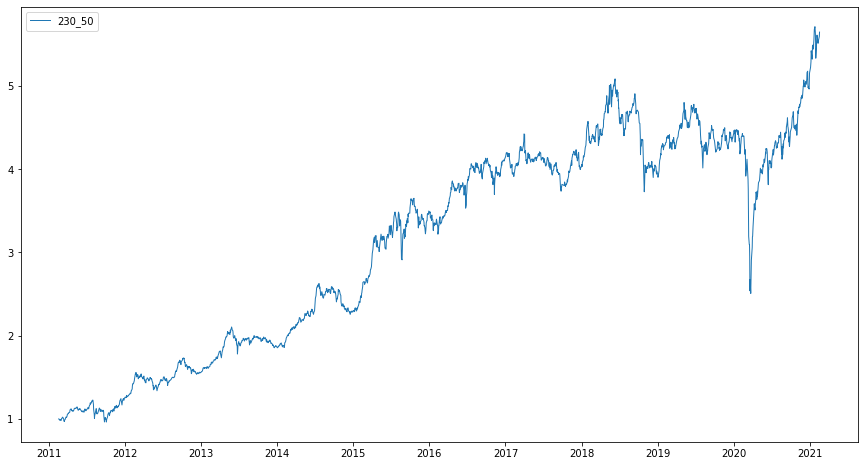

In [97]:
#일단 그려보자!
plt.figure(figsize = (15,8))
plt.plot(backtest_230_50.index, backtest_230_50['total_change'], linewidth='1.', label='230_50')
plt.legend(loc='upper left')
plt.show()

In [98]:
#몇일부터 몇일까지 레퍼런스 데이터를 불러와야 할지 확인해 봅시다.
backtest_230_50.index

DatetimeIndex(['2011-02-18', '2011-02-21', '2011-02-22', '2011-02-23',
               '2011-02-24', '2011-02-25', '2011-02-28', '2011-03-02',
               '2011-03-03', '2011-03-04',
               ...
               '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-08', '2021-02-09', '2021-02-10',
               '2021-02-15', '2021-02-16'],
              dtype='datetime64[ns]', name='Symbol', length=2462, freq=None)

In [99]:
#pykrx를 활용한 코스피 정보 불러오기.
kospi  =  stock.get_market_ohlcv_by_date ( '20110218' ,  '20210216' ,  'kospi' ,  freq = 'd' ) #[[ '종가' ]] 

In [100]:
#이런식으로 불러와집니다.
kospi

,시가,고가,저가,종가,거래량
날짜,,,,,
2011-02-18,198924,201578,198175,201314,488883
2011-02-21,201415,201498,199170,200530,320724
2011-02-22,197834,198270,195877,196992,342390
2011-02-23,196270,197799,195175,196163,305729
2011-02-24,195763,197066,194541,194988,273855
...,...,...,...,...,...
2021-02-08,311363,312854,308559,309124,1277207
2021-02-09,310225,312966,308467,308467,2145388
2021-02-10,308813,311188,306425,310058,2152916


In [101]:
#코스피의 변화율을 기록해 봅시다.
kospi_change = kospi['종가']/kospi['종가'].iloc[0]
kospi_change

날짜
2011-02-18    1.000000
2011-02-21    0.996106
2011-02-22    0.978531
2011-02-23    0.974413
2011-02-24    0.968576
                ...   
2021-02-08    1.535532
2021-02-09    1.532268
2021-02-10    1.540171
2021-02-15    1.563230
2021-02-16    1.571302
Name: 종가, Length: 2462, dtype: float64

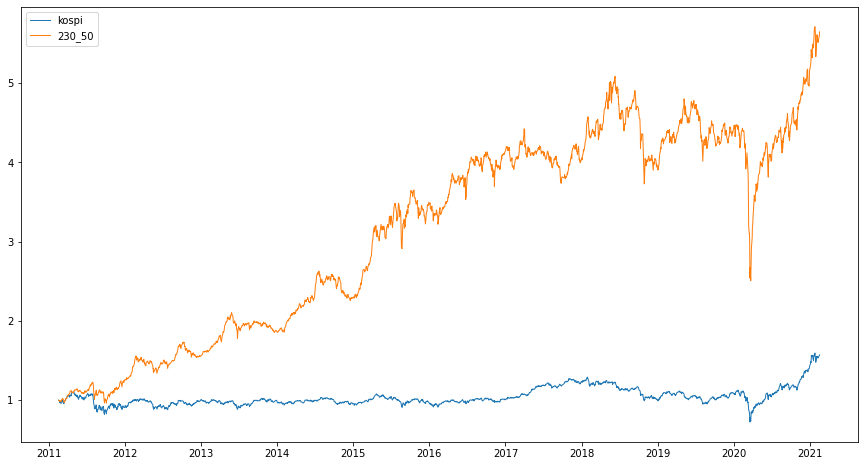

In [102]:
#시장에 비해 얼마나 더 좋은지 볼 수 있는 그래프.
plt.figure(figsize = (15,8))
plt.plot(backtest_230_50.index, kospi_change, linewidth='1.', label='kospi')
plt.plot(backtest_230_50.index, backtest_230_50['total_change'], linewidth='1.', label='230_50')
plt.legend(loc='upper left')
plt.show()

### 많이 그려보자

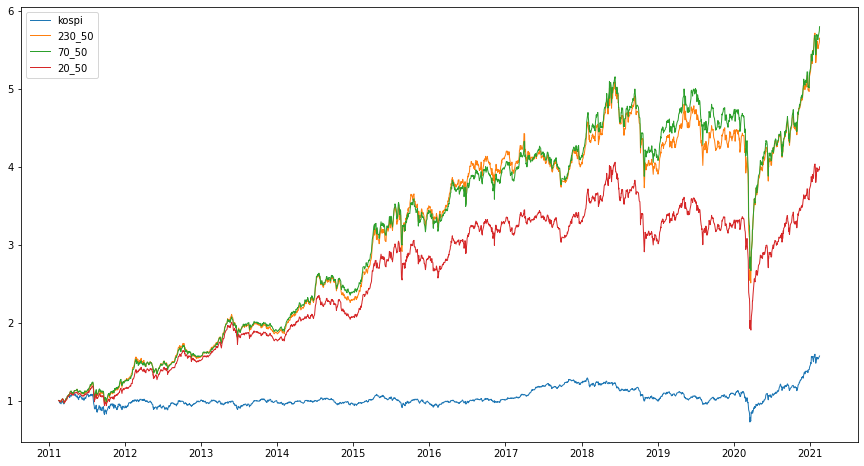

In [103]:
#더 많이 그려보자
#리밸 주기 230일, 70일 20일
screened_rebal_list = get_screened_rebal_list(230)
weight_rebal_list = get_equal_weight_list(screened_rebal_list)
backtest_230_50 = backtest_with_rebalance(pricedata, 100000000, 230, screened_rebal_list, weight_rebal_list, 0.0025)

screened_rebal_list = get_screened_rebal_list(70)
weight_rebal_list = get_equal_weight_list(screened_rebal_list)
backtest_70_50 = backtest_with_rebalance(pricedata, 100000000, 70, screened_rebal_list, weight_rebal_list, 0.0025)

screened_rebal_list = get_screened_rebal_list(20)
weight_rebal_list = get_equal_weight_list(screened_rebal_list)
backtest_20_50 = backtest_with_rebalance(pricedata, 100000000, 20, screened_rebal_list, weight_rebal_list, 0.0025)

plt.figure(figsize = (15,8))
plt.plot(backtest_230_50.index, kospi_change, linewidth='1.', label='kospi')
plt.plot(backtest_230_50.index, backtest_230_50['total_change'], linewidth='1.', label='230_50')
plt.plot(backtest_230_50.index, backtest_70_50['total_change'], linewidth='1.', label='70_50')
plt.plot(backtest_230_50.index, backtest_20_50['total_change'], linewidth='1.', label='20_50')
plt.legend(loc='upper left')
plt.show()

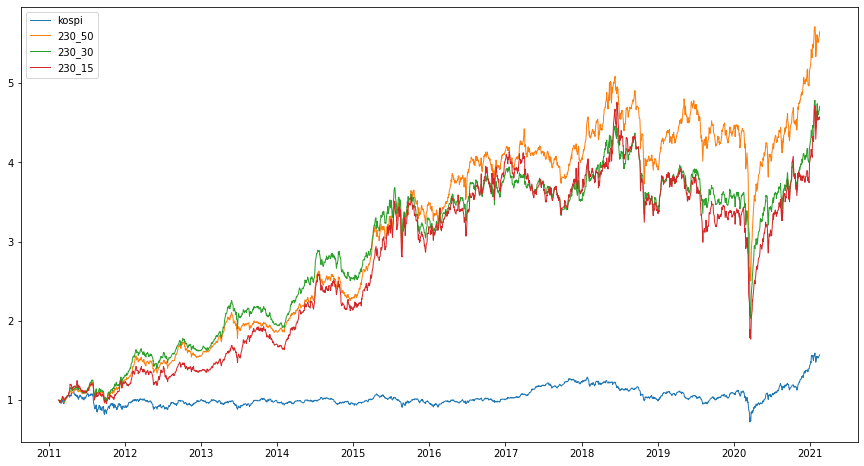

In [104]:
#더 많이 그려보자
#상위 50개, 30개, 15개
screened_rebal_list = get_screened_rebal_list(230, 50)
weight_rebal_list = get_equal_weight_list(screened_rebal_list)
backtest_230_50 = backtest_with_rebalance(pricedata, 100000000, 230, screened_rebal_list, weight_rebal_list, 0.0025)

screened_rebal_list = get_screened_rebal_list(230, 30)
weight_rebal_list = get_equal_weight_list(screened_rebal_list)
backtest_230_30 = backtest_with_rebalance(pricedata, 100000000, 230, screened_rebal_list, weight_rebal_list, 0.0025)

screened_rebal_list = get_screened_rebal_list(230, 15)
weight_rebal_list = get_equal_weight_list(screened_rebal_list)
backtest_230_15 = backtest_with_rebalance(pricedata, 100000000, 230, screened_rebal_list, weight_rebal_list, 0.0025)

plt.figure(figsize = (15,8))
plt.plot(backtest_230_50.index, kospi_change, linewidth='1.', label='kospi')
plt.plot(backtest_230_50.index, backtest_230_50['total_change'], linewidth='1.', label='230_50')
plt.plot(backtest_230_50.index, backtest_230_30['total_change'], linewidth='1.', label='230_30')
plt.plot(backtest_230_50.index, backtest_230_15['total_change'], linewidth='1.', label='230_15')
plt.legend(loc='upper left')
plt.show()

### 성과평가(CAGR, MDD)

In [105]:
screened_rebal_list = get_screened_rebal_list(230, 50)
weight_rebal_list = get_equal_weight_list(screened_rebal_list)
backtest_230_50 = backtest_with_rebalance(pricedata, 100000000, 230, screened_rebal_list, weight_rebal_list, 0.0025) 

In [106]:
backtest_230_50

,stock_value,total_value,total_change
Symbol,,,
2011-02-18,99827218,100000000,1.000000
2011-02-21,99557914,99730696,0.997307
2011-02-22,98930497,99103279,0.991033
2011-02-23,98292380,98465162,0.984652
2011-02-24,98306060,98478842,0.984788
...,...,...,...
2021-02-08,551820460,552127192,5.521272
2021-02-09,551024234,551330966,5.513310
2021-02-10,553368188,553674920,5.536749


In [107]:
#CAGR 구하기
period = len(backtest_230_50.index)/252
period

9.76984126984127

In [108]:
CAGR = (backtest_230_50['total_change'].iloc[-1])**(1/period) - 1
CAGR

0.19387656355511962

In [109]:
def getCAGR(total_change, observe=252):
  period = len(total_change.index)/observe
  return (total_change.iloc[-1])**(1/period) - 1

In [110]:
getCAGR(backtest_230_50['total_change'])

0.19387656355511962

In [111]:
#MDD 구하기
max_list = [1]
for value in backtest_230_50['total_change']:
  if value > max_list[-1]:
    max_list.append(value)
  else:
    max_list.append(max_list[-1])

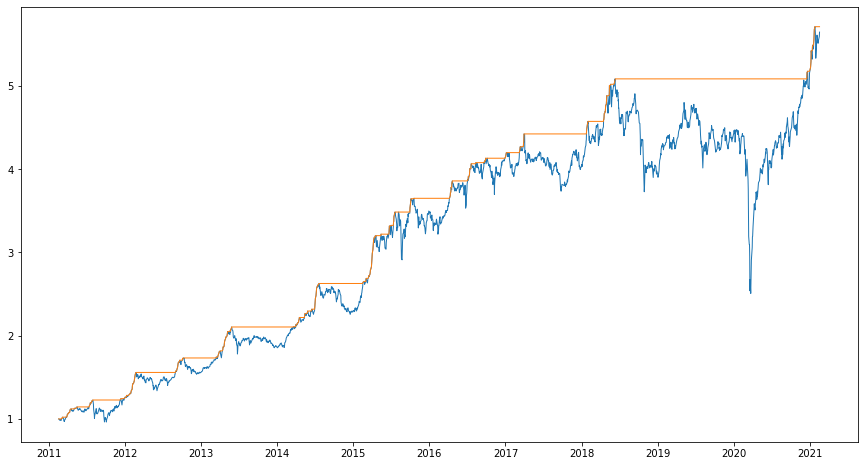

In [112]:
plt.figure(figsize = (15,8))
plt.plot(backtest_230_50.index, backtest_230_50['total_change'], linewidth='1.', label='230_50')
plt.plot(backtest_230_50.index, max_list[1:], linewidth='1.')
plt.show()

In [113]:
mdd_df = pd.DataFrame(index = backtest_230_50.index)
mdd_df['total_change'] = backtest_230_50['total_change']
mdd_df['max'] = max_list[1:]
mdd_df['drawdown'] = (mdd_df['total_change'] / mdd_df['max'] - 1)*100
mdd_df

,total_change,max,drawdown
Symbol,,,
2011-02-18,1.000000,1.000000,0.000000
2011-02-21,0.997307,1.000000,-0.269304
2011-02-22,0.991033,1.000000,-0.896721
2011-02-23,0.984652,1.000000,-1.534838
2011-02-24,0.984788,1.000000,-1.521158
...,...,...,...
2021-02-08,5.521272,5.713063,-3.357061
2021-02-09,5.513310,5.713063,-3.496430
2021-02-10,5.536749,5.713063,-3.086151


In [114]:
min(mdd_df['drawdown'])

-50.68486134058829

In [115]:
def get_mdd(total_change):
  max_list = [1]
  for value in total_change:
    if value > max_list[-1]:
      max_list.append(value)
    else:
      max_list.append(max_list[-1])
  drawdown = (total_change / pd.Series(index = total_change.index, data=max_list[1:]) -1)*100
  return min(drawdown)

In [116]:
get_mdd(backtest_230_50['total_change'])

-50.68486134058829

## 기간수익률(HPR)을 통한 구현

### 이하 내용은 모두 지난학기 5기 김용철 선배님의 강의 자료 그대로 잘라온 것입니다.
뒷 내용은 같이 배포된 파일을 참고해 주세요

#### 1. 기간수익률(HPR, Holding Period Return)

$$HPR_{a,b} = \frac{P_b - P_a}{P_a} = \frac{P_b}{P_a} - 1 $$
$$HPR_{a,b} : a시점부터 b시점까지 보유할 시 수익률$$
$$P_a : a시점 자산 가격$$
$$P_b : b시점 자산 가격$$

#### 2. HPR 계산
만약 (a,b), (b,c), (c,d) 구간의 HPR이 각 각 주어졌을 때, (a,d)구간의 HPR은

|시점|P|
|-|-|
|a|$$P_a$$|
|b|$$P_b$$|
|c|$$P_c$$|
|d|$$P_d$$|

$$HPR_{a,d} = \frac{P_d}{P_a} - 1$$
혹은
$$HPR_{a,d} = (1+HPR_{a,b}) * (1+HPR_{b,c}) * (1+HPR_{c,d} ) -1$$
$$\ \ \ \ \ \  = \frac{P_b}{P_a}\frac{P_c}{P_b}\frac{P_d}{P_c} -1 = \frac{P_d}{P_a} -1$$

In [117]:
price = [100, 120, 110, 140]
HPR = (140 - 100)/100
HPR_ = ((120/100) * (110/120) * (140/ 110)) - 1
print(HPR, HPR_)

0.4 0.3999999999999999


#### 3.두 자산 포트폴리오의 수익률 계산

    #### 포트폴리오 수익률
    
$$ R_P = \Sigma_{i=1}^{N}R_i\times W_i\ \  ,\ \ \ \ \ \  \Sigma W_i = 1$$

$$ R_P : 포트폴리오 수익률$$
$$ R_i : i자산의 수익률, i = 1, 2, ..., N $$
$$ W_i : i자산 투자비중 $$
    
|시점|자산1|자산2|
|-|-|-|
|a|$$P_{1,a}$$|$$P_{2,a}$$|
|b|$$P_{1,b}$$|$$P_{2,b}$$|
|c|$$P_{1,c}$$|$$P_{2,c}$$|
|d|$$P_{1,d}$$|$$P_{2,d}$$|

위 테이블에서 자산1과 자산2의 HPR을 계산한다.

| |자산1|자산2|
|-|-|-|
|HPR|$$R_1$$|$$R_2$$|

위 HPR 테이블을 1 by N 행렬로, 그리고 자산1과 자산2의 비중을 N by 1 행렬로 나타내면
$$ HPR \times W = [R_1, R_2] \begin{bmatrix}W_1 \\ W_2\end{bmatrix}$$
$$ = W_1R_1 + W_2R_2$$

##### 즉, 필요한 연산은 
##### 1)해당 투자기간 동안의 개별 자산들의 HPR을 모두 구한 뒤(stock selection 후 수익률 계산)
##### 2)각 자산들의 수익률과 투자비중 벡터를 곱해준다.

코드로 표현하면

In [118]:
HPR = [1.123, 1.045]
W = [0.4, 0.6]

#HPR과 W 모두 행렬 연산을 위해 numpy array로 자료형을 바꿔준다.
HPR = np.asarray(HPR)
W = np.asarray(W)
print(1.123 * 0.4 + 1.045 * 0.6)
print(np.dot(HPR,W))
#혹은
print(HPR @ W.T) # 처럼 @ operator도 사용 가능.

#단, 여기서 계산의 편리함을 위해 앞으로 수익률은 원금과 수익금을 포함한 개념인 1+HPR을 사용하기로 한다.
#예를들면 10% 수익 => 1.1, 5% 손실 => 0.95

1.0762
1.0762
1.0762
